In [55]:
import numpy as np
import pandas as pd 
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new=le.fit(["Country", "Region"])
df_new1=le.fit_transform(["Country", "Region"])

In [58]:
df_new

LabelEncoder()

In [59]:
df_new1

array([0, 1], dtype=int64)

In [60]:
df.shape

(158, 12)

In [61]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [62]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
for cols in df.columns:
    if df[cols].dtype=='object':
        le=LabelEncoder()
        df[cols]=le.fit_transform(df[cols])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

In [65]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<AxesSubplot:>

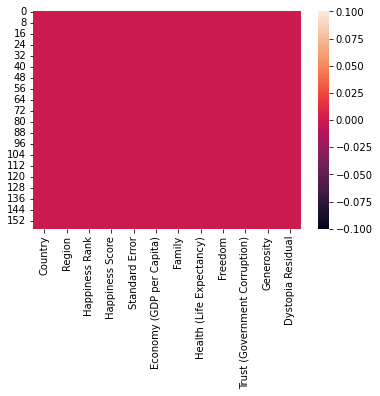

In [66]:
sb.heatmap(df.isnull())

Correlation

In [67]:
dfcor=df.corr()
dfcor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


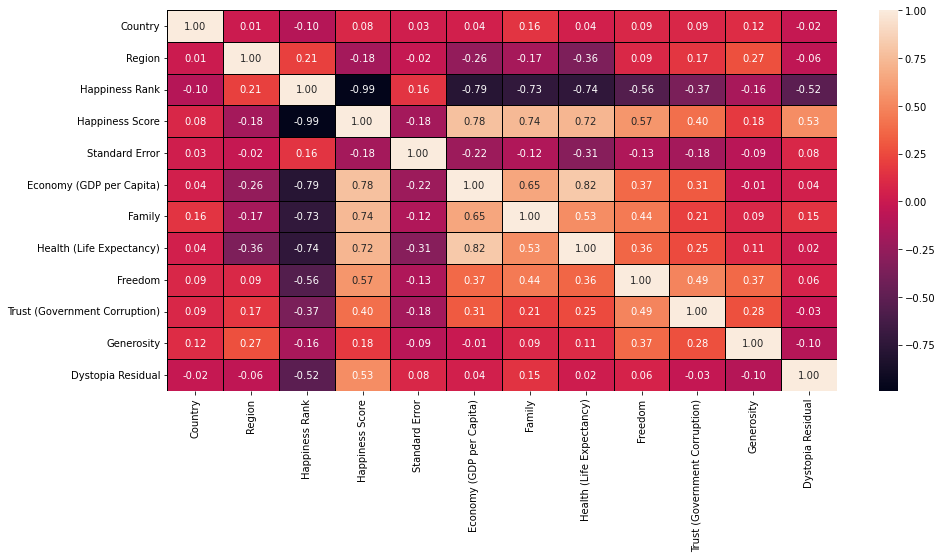

In [68]:
corr=df.corr()
plt.figure(figsize=(15,7))
sb.heatmap(corr,annot=True,linewidths=0.5,linecolor="black",fmt=".2f")
plt.show()

# Describe Data

In [69]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


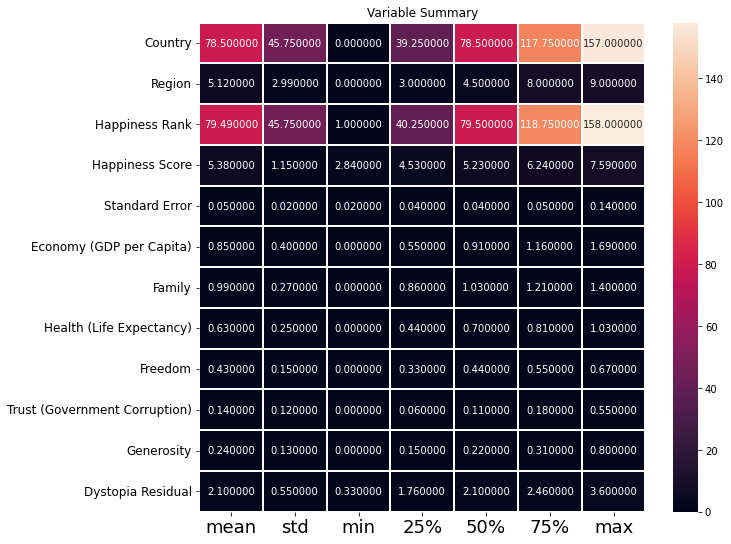

In [70]:
plt.figure(figsize=(10,9))
sb.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

# Outliers Checking

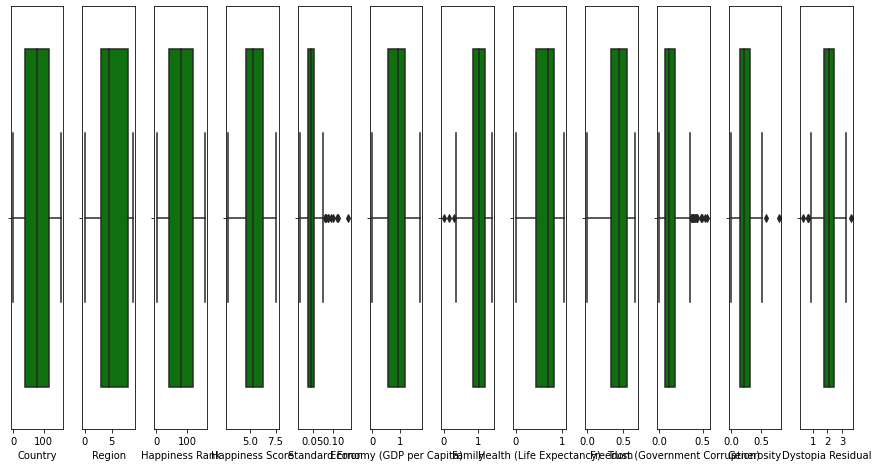

In [71]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sb.boxplot(df[collist[i]],color='green',orient='y')
    plt.tight_layout()

# Skewness

In [72]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

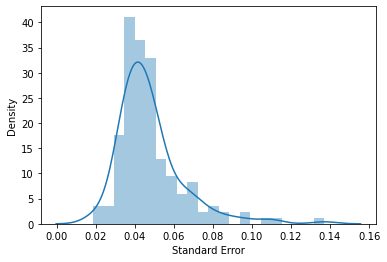

In [73]:
sb.distplot(df["Standard Error"])

<AxesSubplot:xlabel='Family', ylabel='Density'>

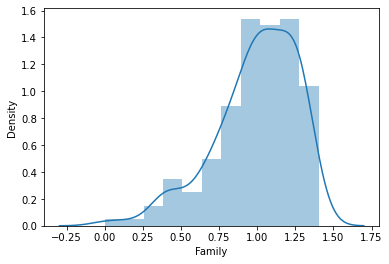

In [74]:
sb.distplot(df["Family"])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

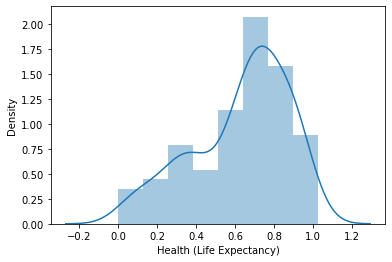

In [75]:
sb.distplot(df["Health (Life Expectancy)"])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

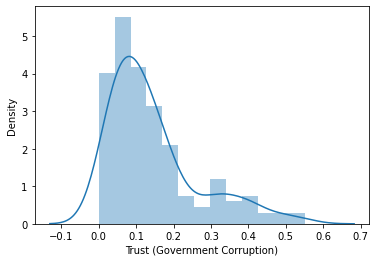

In [76]:
sb.distplot(df["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

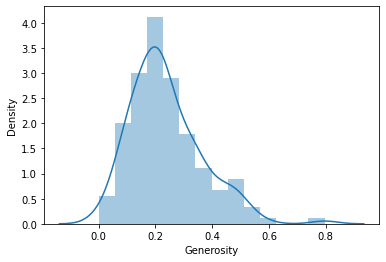

In [77]:
sb.distplot(df["Generosity"])

# Removing Outlier

In [78]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 12)

In [79]:
thresold =3 
print (np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [80]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print (df_new.shape)

(158, 12)
(149, 12)


Percentage Loss of Data

In [81]:
loss_percentage=(158-149)/158*100
print (loss_percentage)

5.69620253164557


In [82]:
df_new

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [83]:
y=df_new.iloc[:,3]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

In [84]:
x=df_new.iloc[:,range(4,12)]
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Tramsforming Data To Remove Skewness

In [85]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[-0.95033703,  1.49245411,  1.65888016, ...,  1.81762514,
         0.65957855,  0.75525527],
       [ 0.37856182,  1.19406711,  2.00912496, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-1.04140135,  1.26661161,  1.73078528, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-1.32081011, -1.36521585, -2.08738878, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-0.69272644, -1.43304072, -2.01044293, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [ 2.17876604, -1.93874732, -1.90641014, ..., -0.14727363,
        -0.17248608, -0.55359236]])

We Will Use Linear Regression as the Happiness score keeps on changing with Influenceing parameters

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [88]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)
        
              
                


SyntaxError: invalid syntax (467788165.py, line 11)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=66) #Random state = 66

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

Regularization

1. Lasso

In [91]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [92]:
ls=Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')


At CV :- 2
Cross Validation Score is :- 85.49078830718103
R2_score is :- 99.46943901445302


At CV :- 3
Cross Validation Score is :- 88.68717639883047
R2_score is :- 99.46943901445302


At CV :- 4
Cross Validation Score is :- 82.70652758736114
R2_score is :- 99.46943901445302


At CV :- 5
Cross Validation Score is :- 81.20244334525465
R2_score is :- 99.46943901445302


At CV :- 6
Cross Validation Score is :- 74.24432891107006
R2_score is :- 99.46943901445302


At CV :- 7
Cross Validation Score is :- 60.44797393068875
R2_score is :- 99.46943901445302


At CV :- 8
Cross Validation Score is :- 57.64752974682725
R2_score is :- 99.46943901445302


At CV :- 9
Cross Validation Score is :- 48.44661244139583
R2_score is :- 99.46943901445302




In [93]:
#At CV :- 3
#Cross Validation Score is :- 80.1092822453501
#R2_score is :- 99.02765776397887

#Therefor CV should be 3 

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 0.06622422248181455
Mean Square Error: 0.006355051915545166
Root Mean Sqaured Error: 0.07971857948775284


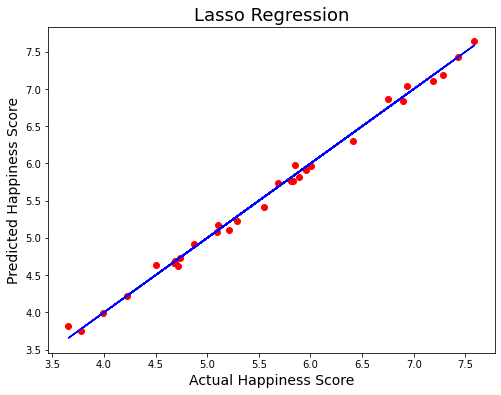

In [95]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Data points are near best fit lines. Check with other models also

2 Ridge Regression

In [96]:
from sklearn.linear_model import Ridge
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'fit_intercept':[True,False],'normalize':[True,False],'copy_x':[True,False],'random_state'=list(range(0,10),'tol'=[.0001,.001,.01,.1,1])}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

SyntaxError: invalid syntax (3689577079.py, line 2)

Ensembler Technique

In [97]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [98]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: 76.76631339673328
Cross Val Score: -409.2743523826006


In [99]:
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 0.06622422248181455
Mean Square Error: 0.006355051915545166
Root Mean Sqaured Error: 0.07971857948775284


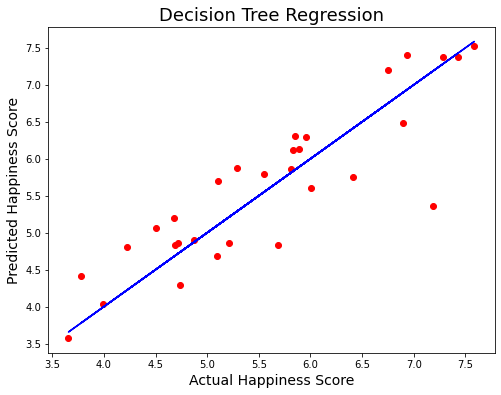

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Happiness Score',fontsize=14)
plt.ylabel('Predicted Happiness Score',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Datapoint are scatter from the best fit line

The Best Model is Lasso. Since the precentage score of Cross Validation and r2_score is optimum

Model Saving

In [102]:
import pickle
filename='world_happiness_report.pkl'
pickle.dump(ls,open(filename,'wb'))

Conclusion

In [101]:
import numpy as np
a=np.array(y_test)
a

array([4.715, 5.212, 4.507, 6.937, 5.96 , 4.739, 7.587, 4.677, 7.187,
       3.781, 5.848, 5.102, 5.098, 5.286, 6.003, 7.286, 5.548, 4.218,
       4.686, 7.427, 3.656, 5.89 , 5.813, 4.867, 5.689, 6.901, 5.828,
       3.989, 6.411, 6.75 ])

In [ ]:
df_com=pd.DataFrame({"Original":a,"Predicted":pred_ls},index=range(len(a)))
df_com

From The Above table we can say that model is predicting the values with 85 to 95 Percent Accuracy 